## Importing libraries

In [ ]:
!pip install numpy==1.26.4
!pip install scikit-learn-extra


In [2]:
from sklearn_extra.cluster import KMedoids
import pandas as pd
from sklearn.preprocessing import StandardScaler

## Data collection & Analysis

In [4]:
df = pd.read_csv('/content/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [7]:
df.shape

(8950, 18)

In [8]:
df = df.drop(columns=['CUST_ID'])

In [9]:
df.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [10]:
print(df.var().sort_values())

CASH_ADVANCE_FREQUENCY              4.004857e-02
BALANCE_FREQUENCY                   5.612351e-02
PRC_FULL_PAYMENT                    8.555578e-02
ONEOFF_PURCHASES_FREQUENCY          8.900441e-02
PURCHASES_INSTALLMENTS_FREQUENCY    1.579647e-01
PURCHASES_FREQUENCY                 1.610985e-01
TENURE                              1.791129e+00
CASH_ADVANCE_TRX                    4.657580e+01
PURCHASES_TRX                       6.179027e+02
INSTALLMENTS_PURCHASES              8.178274e+05
ONEOFF_PURCHASES                    2.755228e+06
BALANCE                             4.332775e+06
CASH_ADVANCE                        4.398096e+06
PURCHASES                           4.565208e+06
MINIMUM_PAYMENTS                    5.628503e+06
PAYMENTS                            8.381394e+06
CREDIT_LIMIT                        1.324098e+07
dtype: float64


## Choosing columns with high variance

In [11]:
x = df[['CASH_ADVANCE_TRX','PURCHASES_TRX','INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES','BALANCE','CASH_ADVANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT']]

In [12]:
x

,CASH_ADVANCE_TRX,PURCHASES_TRX,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES,BALANCE,CASH_ADVANCE,PURCHASES,MINIMUM_PAYMENTS,PAYMENTS,CREDIT_LIMIT
0,0,2,95.40,0.00,40.900749,0.000000,95.40,139.509787,201.802084,1000.0
1,4,0,0.00,0.00,3202.467416,6442.945483,0.00,1072.340217,4103.032597,7000.0
2,0,12,0.00,773.17,2495.148862,0.000000,773.17,627.284787,622.066742,7500.0
3,1,1,0.00,1499.00,1666.670542,205.788017,1499.00,NaN,0.000000,7500.0
4,0,1,0.00,16.00,817.714335,0.000000,16.00,244.791237,678.334763,1200.0
...,...,...,...,...,...,...,...,...,...,...
8945,0,6,291.12,0.00,28.493517,0.000000,291.12,48.886365,325.594462,1000.0
8946,0,6,300.00,0.00,19.183215,0.000000,300.00,NaN,275.861322,1000.0
8947,0,5,144.40,0.00,23.398673,0.000000,144.40,82.418369,81.270775,1000.0
8948,2,0,0.00,0.00,13.457564,36.558778,0.00,55.755628,52.549959,500.0


In [13]:
x[['MINIMUM_PAYMENTS','CREDIT_LIMIT']] = x[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].fillna(x[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].mean())

/tmp/ipython-input-4248281106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['MINIMUM_PAYMENTS','CREDIT_LIMIT']] = x[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].fillna(x[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].mean())


In [14]:
x.isnull().sum()

,0
CASH_ADVANCE_TRX,0
PURCHASES_TRX,0
INSTALLMENTS_PURCHASES,0
ONEOFF_PURCHASES,0
BALANCE,0
CASH_ADVANCE,0
PURCHASES,0
MINIMUM_PAYMENTS,0
PAYMENTS,0
CREDIT_LIMIT,0


In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

In [17]:
x_scaled

,CASH_ADVANCE_TRX,PURCHASES_TRX,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES,BALANCE,CASH_ADVANCE,PURCHASES,MINIMUM_PAYMENTS,PAYMENTS,CREDIT_LIMIT
0,-0.476070,-0.511333,-0.349079,-0.356934,-0.731989,-0.466786,-0.424900,-3.109675e-01,-0.528979,-0.960433
1,0.110074,-0.591796,-0.454576,-0.356934,0.786961,2.605605,-0.469552,8.931021e-02,0.818642,0.688639
2,-0.476070,-0.109020,-0.454576,0.108889,0.447135,-0.466786,-0.107668,-1.016632e-01,-0.383805,0.826062
3,-0.329534,-0.551565,-0.454576,0.546189,0.049099,-0.368653,0.232058,4.878305e-17,-0.598688,0.826062
4,-0.476070,-0.551565,-0.454576,-0.347294,-0.358775,-0.466786,-0.462063,-2.657913e-01,-0.364368,-0.905464
...,...,...,...,...,...,...,...,...,...,...
8945,-0.476070,-0.350408,-0.132643,-0.356934,-0.737950,-0.466786,-0.333293,-3.498541e-01,-0.486217,-0.960433
8946,-0.476070,-0.350408,-0.122823,-0.356934,-0.742423,-0.466786,-0.329136,4.878305e-17,-0.503396,-0.960433
8947,-0.476070,-0.390639,-0.294893,-0.356934,-0.740398,-0.466786,-0.401965,-3.354655e-01,-0.570615,-0.960433
8948,-0.182998,-0.591796,-0.454576,-0.356934,-0.745174,-0.449352,-0.469552,-3.469065e-01,-0.580536,-1.097856


In [18]:
kmedoids = KMedoids(n_clusters=5, random_state=42)

In [19]:
kmedoids.fit(x_scaled)

KMedoids(n_clusters=5, random_state=42)

In [20]:
labels = kmedoids.labels_


In [21]:
labels

array([4, 3, 0, ..., 4, 4, 2])

In [22]:
df['Cluster'] = labels


In [23]:
df.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,2
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


In [24]:
df['Cluster'].value_counts()


,count
Cluster,
2,2522
4,2066
3,1667
1,1350
0,1345


## Cluster count plot

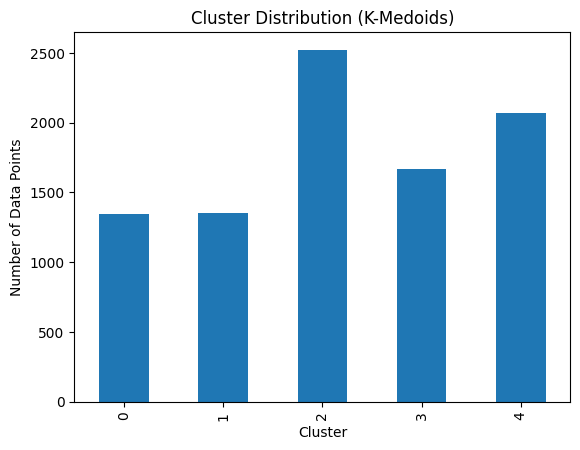

In [25]:
import matplotlib.pyplot as plt

df['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Distribution (K-Medoids)')
plt.show()
